In [1]:
##Validation of how many impedance features are appropriate, computational time and accuracy

In [331]:
# imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from matplotlib.font_manager import FontProperties
import shap

shap.initjs()


In [332]:
#配色
greense = (0/255, 151/255, 37/255,1)
bluese = (0/255, 139/255, 251/255,1)
redse = (255/255, 0/255, 78/255,1)
purplese = (196/255, 78/255, 212/255,1)
brownse = (208/255, 134/255, 48/255,1)
greyse = (158/255, 158/255, 158/255,1)
bluegreyse = (76/255, 114/255, 176/255,1)
orangese = (255/255, 127/255, 14/255,1)
font = FontProperties(family='Arial', size=12)

In [333]:
# 指定文件路径
file_path = "../SOH1/EIS_state_V/EIS_V.txt"
# file_path = "../SOH1/EISSTATEI/EIS_I_HEBING.txt"

# file_path = "../SOH1/EISstateIX/EIS_IX_HEBING.txt"
# 读取文本文件，使用多个制表符作为分隔符
data = pd.read_csv(file_path, sep='\t', header=None, names=["Z_" + str(i) for i in range(120)])

# 显示前几行数据
data.head()

,Z_0,Z_1,Z_2,Z_3,Z_4,Z_5,Z_6,Z_7,Z_8,Z_9,...,Z_110,Z_111,Z_112,Z_113,Z_114,Z_115,Z_116,Z_117,Z_118,Z_119
0,0.38470,0.39156,0.39684,0.40341,0.40963,0.41925,0.42764,0.43530,0.44525,0.45744,...,0.08888,0.10230,0.11767,0.13411,0.15473,0.18024,0.21535,0.25411,0.29026,0.32795
1,0.38886,0.39343,0.40066,0.40798,0.41472,0.42210,0.43087,0.44032,0.45061,0.46045,...,0.09005,0.10526,0.12138,0.13894,0.15901,0.18200,0.21310,0.24700,0.28064,0.32300
2,0.39038,0.39600,0.40250,0.40874,0.41617,0.42422,0.43090,0.44257,0.45141,0.46294,...,0.09073,0.10267,0.11865,0.14024,0.16487,0.18764,0.21288,0.24707,0.28773,0.32955
3,0.39194,0.39643,0.40406,0.41059,0.41739,0.42510,0.43446,0.44279,0.45283,0.46578,...,0.09112,0.10434,0.12045,0.13810,0.15939,0.18213,0.21587,0.25741,0.29768,0.33673
4,0.39225,0.39760,0.40540,0.41088,0.41967,0.42648,0.43666,0.44412,0.45343,0.46610,...,0.09144,0.10645,0.12356,0.14088,0.16121,0.18483,0.21609,0.24984,0.28396,0.32562


In [334]:
data

,Z_0,Z_1,Z_2,Z_3,Z_4,Z_5,Z_6,Z_7,Z_8,Z_9,...,Z_110,Z_111,Z_112,Z_113,Z_114,Z_115,Z_116,Z_117,Z_118,Z_119
0,0.38470,0.39156,0.39684,0.40341,0.40963,0.41925,0.42764,0.43530,0.44525,0.45744,...,0.08888,0.10230,0.11767,0.13411,0.15473,0.18024,0.21535,0.25411,0.29026,0.32795
1,0.38886,0.39343,0.40066,0.40798,0.41472,0.42210,0.43087,0.44032,0.45061,0.46045,...,0.09005,0.10526,0.12138,0.13894,0.15901,0.18200,0.21310,0.24700,0.28064,0.32300
2,0.39038,0.39600,0.40250,0.40874,0.41617,0.42422,0.43090,0.44257,0.45141,0.46294,...,0.09073,0.10267,0.11865,0.14024,0.16487,0.18764,0.21288,0.24707,0.28773,0.32955
3,0.39194,0.39643,0.40406,0.41059,0.41739,0.42510,0.43446,0.44279,0.45283,0.46578,...,0.09112,0.10434,0.12045,0.13810,0.15939,0.18213,0.21587,0.25741,0.29768,0.33673
4,0.39225,0.39760,0.40540,0.41088,0.41967,0.42648,0.43666,0.44412,0.45343,0.46610,...,0.09144,0.10645,0.12356,0.14088,0.16121,0.18483,0.21609,0.24984,0.28396,0.32562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2296,0.37706,0.38562,0.39357,0.40224,0.41037,0.41679,0.42318,0.43253,0.43888,0.44742,...,0.10173,0.11657,0.13491,0.15962,0.19166,0.22601,0.25500,0.28455,0.31862,-0.01155
2297,0.37779,0.38679,0.39343,0.40311,0.40990,0.41774,0.42518,0.43287,0.44012,0.44734,...,0.10225,0.12244,0.14462,0.16723,0.18730,0.21474,0.24555,0.27476,0.30644,-0.01062
2298,0.37796,0.38568,0.39259,0.40104,0.41050,0.41697,0.42654,0.43222,0.43864,0.44691,...,0.10310,0.12321,0.14435,0.16571,0.18709,0.21492,0.24563,0.27498,0.30743,-0.01054
2299,0.37740,0.38399,0.39485,0.40211,0.40978,0.41650,0.42370,0.43107,0.43843,0.44724,...,0.10333,0.12365,0.14414,0.16640,0.18701,0.21457,0.24491,0.27413,0.30817,-0.01049


In [335]:
np.shape(data)

(2301, 120)

In [336]:
# 指定 y 文件的路径
# y_file_path = "../SOH1/合集数据/SOH_all_40_temp.txt"
# y_file_path = "../SOH1/SOH_all_1.txt"
y_file_path = "../SOH1/合集数据/NEWSOH_all_40.txt"
# 读取 y 文件
with open(y_file_path, "r") as file:
    # 逐行读取 y 值，将其转换为浮点数并存储在一个列表中
    y_values = [float(line.strip()) for line in file]

# 将 y 值存储在 Pandas Series 中
y_series = pd.Series(y_values, name="SOH")

# 显示前几个 y 值
np.shape(y_series)

(2301,)

In [337]:
# C0 = data
# #25
# C1 = data.loc[0:189].copy()
# C2 = data.loc[190:369].copy()
# C3 = data.loc[370:570].copy()
# C4 = data.loc[571:604].copy() ##坏的,不可单独使用
# C5 = data.loc[605:797].copy()  ##24678d坏
# C6 = data.loc[798:953].copy()
# C7 = data.loc[954:1046].copy()
# C8 = data.loc[1047:1082].copy() ##坏的
# #35
# C9 = data.loc[1083:1376].copy()
# C10 = data.loc[1377:1693].copy()
# #45
# C11 = data.loc[1624:1991].copy()
# C12 = data.loc[1992:2300].copy()

# C13 = data.loc[0:2300].copy() #C1-C5
# C14 = data.loc[910:1121].copy()  #C6C7

In [338]:
# Y0 = y_series
# Y1 = y_series.loc[0:189].copy()
# Y2 = y_series.loc[190:369].copy() #坏的
# Y3 = y_series.loc[370:570].copy()

# Y4 = y_series.loc[571:604].copy() ##坏的,不可单独使用
# Y5 = y_series.loc[605:797].copy()

# Y6 = y_series.loc[798:953].copy()##坏的,不可单独使用
# Y7 = y_series.loc[954:1046].copy()##坏的,不可单独使用

# Y8 = y_series.loc[1047:1082].copy() ##坏的
# #35
# Y9 = y_series.loc[1083:1376].copy()
# Y10 = y_series.loc[1377:1693].copy()
# #45
# Y11 = y_series.loc[1624:1991].copy()
# Y12 = y_series.loc[1992:2300].copy()

# ##
# Y13 = y_series.loc[0:2300].copy()
# Y14 = y_series.loc[910:1121].copy()


In [339]:
L1=list(range(0, 190))
L2=list(range(190, 370))
L3=list(range(370, 571))
L4=list(range(571, 605))
L5=list(range(605, 798))
L6=list(range(798, 953))
L7=list(range(954, 1046))
L8=list(range(1047, 1082))

L9=list(range(1083, 1377))
L10=list(range(1377, 1694))
L11=list(range(1764, 1991))
L12=list(range(1992, 2301))

In [340]:
C0 = data
#25
C1 = data.loc[L1].copy()
C2 = data.loc[L2].copy()
C3 = data.loc[L3].copy()
C4 = data.loc[L4].copy() ##坏的,不可单独使用
C5 = data.loc[L5].copy()  ##24678d坏的
C6 = data.loc[L6].copy()
C7 = data.loc[L7].copy()
C8 = data.loc[L8].copy() ##坏的
#35
C9 = data.loc[L9].copy()
C10 = data.loc[L10].copy()
#45
C11 = data.loc[L11].copy()
C12 = data.loc[L12].copy()

In [341]:
Y0 = y_series
#25
Y1 = y_series.loc[L1].copy()
Y2 = y_series.loc[L2].copy()
Y3 = y_series.loc[L3].copy()

Y4 = y_series.loc[L4].copy() ##坏的,不可单独使用
Y5 = y_series.loc[L5].copy()  ##24678d坏的

Y6 = y_series.loc[L6].copy()
Y7 = y_series.loc[L7].copy()

Y8 = y_series.loc[L8].copy() ##坏的
#35
Y9 = y_series.loc[L9].copy()
Y10 = y_series.loc[L10].copy()
#45
Y11 = y_series.loc[L11].copy()
Y12 = y_series.loc[L12].copy()

In [342]:
# #1,3,5,9,10,11,12
# waqu = list(range(0, 954)) + list(range(1047, 2300))
waqu = L1+L3+L5+L10+L11+L12
#9,11,12
# Use iloc to select the rows
X_train = data.loc[waqu].copy()
y_train = y_series.loc[waqu].copy()

X_test = C9
y_test = Y9

In [343]:
select_battery = '9'
MLmodel = 'XGBoost'

In [344]:
# # #1,3,5,9,10,11,12
# # waqu = list(range(0, 954)) + list(range(1047, 2300))
# waqu = L3 +L5+L1+ L12 + L9 + L10+ L11
# #9,11,12
# # Use iloc to select the rows
# X_train = data.loc[waqu].copy()
# y_train = y_series.loc[waqu].copy()

# X_test = C1
# y_test = Y1

In [345]:
print("训练集",np.shape(X_train),np.shape(y_train),"测试集",np.shape(X_test),np.shape(y_test))

训练集 (1437, 120) (1437,) 测试集 (294, 120) (294,)


In [346]:
select_battery

'9'

In [347]:
X_train

,Z_0,Z_1,Z_2,Z_3,Z_4,Z_5,Z_6,Z_7,Z_8,Z_9,...,Z_110,Z_111,Z_112,Z_113,Z_114,Z_115,Z_116,Z_117,Z_118,Z_119
0,0.38470,0.39156,0.39684,0.40341,0.40963,0.41925,0.42764,0.43530,0.44525,0.45744,...,0.08888,0.10230,0.11767,0.13411,0.15473,0.18024,0.21535,0.25411,0.29026,0.32795
1,0.38886,0.39343,0.40066,0.40798,0.41472,0.42210,0.43087,0.44032,0.45061,0.46045,...,0.09005,0.10526,0.12138,0.13894,0.15901,0.18200,0.21310,0.24700,0.28064,0.32300
2,0.39038,0.39600,0.40250,0.40874,0.41617,0.42422,0.43090,0.44257,0.45141,0.46294,...,0.09073,0.10267,0.11865,0.14024,0.16487,0.18764,0.21288,0.24707,0.28773,0.32955
3,0.39194,0.39643,0.40406,0.41059,0.41739,0.42510,0.43446,0.44279,0.45283,0.46578,...,0.09112,0.10434,0.12045,0.13810,0.15939,0.18213,0.21587,0.25741,0.29768,0.33673
4,0.39225,0.39760,0.40540,0.41088,0.41967,0.42648,0.43666,0.44412,0.45343,0.46610,...,0.09144,0.10645,0.12356,0.14088,0.16121,0.18483,0.21609,0.24984,0.28396,0.32562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2296,0.37706,0.38562,0.39357,0.40224,0.41037,0.41679,0.42318,0.43253,0.43888,0.44742,...,0.10173,0.11657,0.13491,0.15962,0.19166,0.22601,0.25500,0.28455,0.31862,-0.01155
2297,0.37779,0.38679,0.39343,0.40311,0.40990,0.41774,0.42518,0.43287,0.44012,0.44734,...,0.10225,0.12244,0.14462,0.16723,0.18730,0.21474,0.24555,0.27476,0.30644,-0.01062
2298,0.37796,0.38568,0.39259,0.40104,0.41050,0.41697,0.42654,0.43222,0.43864,0.44691,...,0.10310,0.12321,0.14435,0.16571,0.18709,0.21492,0.24563,0.27498,0.30743,-0.01054
2299,0.37740,0.38399,0.39485,0.40211,0.40978,0.41650,0.42370,0.43107,0.43843,0.44724,...,0.10333,0.12365,0.14414,0.16640,0.18701,0.21457,0.24491,0.27413,0.30817,-0.01049


数据读取完毕，开始可视化。

## 第一次计算精度，全部特征

In [348]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [349]:
# train model
model = xgb.XGBRegressor(objective="reg:squarederror")
# model.fit(X, y)
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

参数寻优

In [350]:
# from sklearn.model_selection import GridSearchCV
# from xgboost import XGBRegressor
# from sklearn.datasets import load_boston
# from sklearn.model_selection import train_test_split

# # 加载数据
# data = load_boston()
# X, y = data.data, data.target
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # 定义模型
# xgb = XGBRegressor()

# # 定义参数网格
# param_grid = {
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'n_estimators': [100, 500, 1000]
# }

# # 创建网格搜索对象
# grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# # 执行网格搜索
# grid_search.fit(X_train, y_train)

# # 输出最佳参数
# print("Best parameters found: ", grid_search.best_params_)


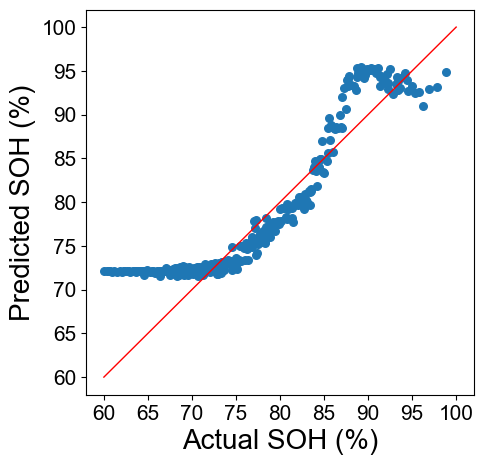

In [351]:
# get predictions
y_pred = model.predict(X_test)
# model evaluation
plt.figure(figsize=(5, 5))

plt.scatter(y_test, y_pred,s=30)
plt.plot([60, 100], [60, 100], color="r", linestyle="-", linewidth=1)

plt.xticks(fontsize=15,fontproperties=font)  # 设置横坐标刻度的字体大小为 15
plt.yticks(fontsize=15,fontproperties=font)  # 设置纵坐标刻度的字体大小为 15
plt.ylabel("Predicted SOH (%)", fontdict={'size': 20, 'family': 'Arial'})
plt.xlabel("Actual SOH (%)", fontdict={'size': 20, 'family': 'Arial'})
plt.savefig( f"被测电池_{select_battery}_模型{MLmodel}_all_z.pdf", format='pdf', dpi=600, bbox_inches='tight')
plt.savefig( f"被测电池_{select_battery}_模型{MLmodel}_all_z.jpg", format='jpg', dpi=1000, bbox_inches='tight')
plt.show()
plt.close()

In [352]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# mse = mean_squared_error(y, y_pred)
mse_all = mean_squared_error(y_test, y_pred)
print("均方误差 (MSE):", mse_all)

rmse_all = np.sqrt(mse_all)
print("均方根误差 (RMSE):", rmse_all)

# r2 = r2_score(y, y_pred)
r2_all = r2_score(y_test, y_pred)
print("决定系数 (R^2):", r2_all)

均方误差 (MSE): 15.908540323579668
均方根误差 (RMSE): 3.9885511559436804
决定系数 (R^2): 0.8107338676050864


1) Standard SHAP values

In [353]:
%%time
# get shap values
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

# shap_values = explainer(X[0:100])

Wall time: 192 ms


In [354]:
# shap_values_values = np.array(shap_values.values)

# # 保存到文件
# np.savetxt('shap_values_values.txt', shap_values_values)

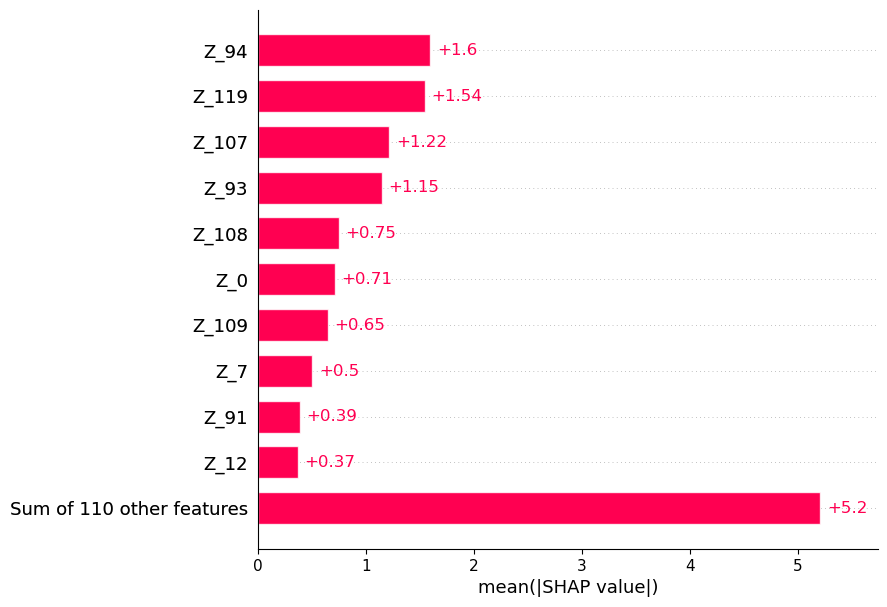

In [355]:
# mean SHAP
shap.plots.bar(shap_values, max_display=11,show=False)
# plt.savefig( f"被测电池_{select_battery}_模型{MLmodel}_meanshap.pdf", format='pdf', dpi=600, bbox_inches='tight')
# plt.savefig( f"被测电池_{select_battery}_模型{MLmodel}_meanshap.jpg", format='jpg', dpi=1000, bbox_inches='tight')
plt.show()
plt.close()

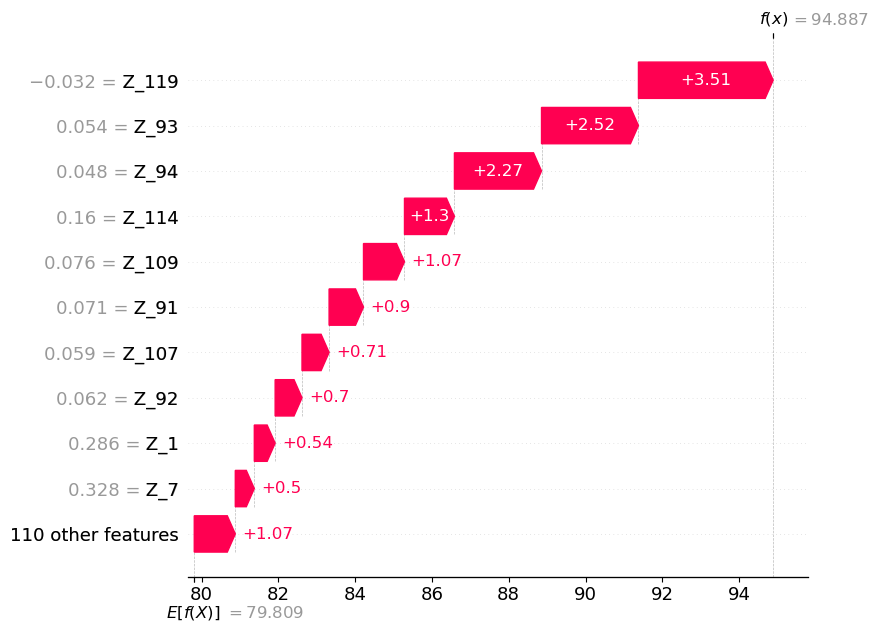

In [356]:
# waterfall plot for first observation
# shap.plots.waterfall(shap_values[0])
shap.plots.waterfall(shap_values[0], max_display=11,show=False)

# plt.savefig('单次预测1.pdf', format='pdf', dpi=600, bbox_inches='tight')
# plt.savefig( '单次预测1.jpg', format='jpg', dpi=1000, bbox_inches='tight')
plt.show()
plt.close()

In [357]:
shap.plots.force(shap_values[1])

In [358]:
# force plot
shap.plots.force(shap_values[1],show=False)
# plt.savefig('kaitiwforceplot.pdf', format='pdf', dpi=600, bbox_inches='tight')
# plt.savefig( f"kaitiforceplot.jpg", format='jpg', dpi=1000, bbox_inches='tight')

plt.show()
plt.close()

In [359]:
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb

# 定义数据集和模型，假设已经定义好了 shap_values、X_train、X_test、y_train、y_test、select_battery 和 MLmodel
font = {'family': 'Arial', 'size': 15}
abs_shap_values = np.abs(shap_values.values)  # 取绝对值
mean = abs_shap_values.sum(axis=0)  # 按列求和
num_samples = shap_values.values.shape[0]

# 创建一个 DataFrame 来保存结果
results = pd.DataFrame(columns=['k', 'MSE_all', 'RMSE_all', 'R2_all', 'MSE_topk', 'RMSE_topk', 'R2_topk', 'T'])

results = results.append({'MSE_all': mse_all,
                              'RMSE_all': rmse_all,
                              'R2_all': r2_all}, ignore_index=True)
feature_times = [
    50.02501251, 39.55696203, 31.3283208, 24.74022761, 19.6001568,
    15.52072016, 12.26542377, 9.700261907, 7.68816791, 6.078288354,
    4.80977346, 3.807928106, 3.013591297, 2.382313703, 1.884410274,
    1.490935115, 1.180163807, 0.933889932, 0.738814351, 0.584959521,
    0.462847251, 0.365567891, 0.289279867, 0.228863851, 0.181248074,
    0.143359927, 0.113408001, 0.089727945, 0.071082653, 0.056191992,
    0.044479989, 0.035200001, 0.027830857, 0.022044446, 0.017431272,
    0.013789868, 0.010908444, 0.008637217, 0.006832551, 0.005403676,
    0.004275745, 0.003384407, 0.002679467, 0.002118808, 0.001675832,
    0.001325775, 0.001049466, 0.000830672, 0.000656842, 0.000519979,
    0.000411391, 0.000325629, 0.000257647, 0.000203862, 0.000160843,
    0.000127625, 0.000100914, 7.98932E-05, 6.31747E-05, 4.99889E-05,
    50.02501251, 39.55696203, 31.3283208, 24.74022761, 19.6001568,
    15.52072016, 12.26542377, 9.700261907, 7.68816791, 6.078288354,
    4.80977346, 3.807928106, 3.013591297, 2.382313703, 1.884410274,
    1.490935115, 1.180163807, 0.933889932, 0.738814351, 0.584959521,
    0.462847251, 0.365567891, 0.289279867, 0.228863851, 0.181248074,
    0.143359927, 0.113408001, 0.089727945, 0.071082653, 0.056191992,
    0.044479989, 0.035200001, 0.027830857, 0.022044446, 0.017431272,
    0.013789868, 0.010908444, 0.008637217, 0.006832551, 0.005403676,
    0.004275745, 0.003384407, 0.002679467, 0.002118808, 0.001675832,
    0.001325775, 0.001049466, 0.000830672, 0.000656842, 0.000519979,
    0.000411391, 0.000325629, 0.000257647, 0.000203862, 0.000160843,
    0.000127625, 0.000100914, 7.98932E-05, 6.31747E-05, 4.99889E-05
]
#阻抗特征对应时间表
feature_times = np.array(feature_times)
q=121 #调整参数q，控制选择前q-1个阻抗
for k in range(1, q):  # 从 1 到 q-1 进行循环
    meantop = mean.argsort()[-k:][::-1]
    normalized_mean = mean / num_samples
    top_k_values = normalized_mean[meantop]
    X_topk_test = X_test.iloc[:, meantop]
    X_topk = X_train.iloc[:, meantop]
    meantopxuan = [meantop[0]]  # 创建一个新的列表，将第一个元素添加进去
    for i in range(1, len(meantop)):
        flag = True  # 默认标记为 True
        for j in range(len(meantopxuan)):
            # 判断当前元素与已存在的元素的差是否超过60
            if abs(meantop[i] - meantopxuan[j]) == 60:
                flag = False  # 如果超过60，将标记设置为 False
                break  # 结束内层循环
        if flag:
            meantopxuan.append(meantop[i])  # 如果标记为 True，将当前元素添加进新列表
    #print(meantopxuan)
    selected_times = feature_times[meantopxuan]
    ##print(meantop)
    total_time = np.sum(selected_times) * 1
    # 训练模型
    model_select = xgb.XGBRegressor(objective="reg:squarederror")
    model_select.fit(X_topk, y_train)
    
    # 获取预测值
    y_pred_select = model_select.predict(X_topk_test)
    
    # 计算模型评估指标
    mse_top = mean_squared_error(y_test, y_pred_select)
    rmse_top = np.sqrt(mse_top)
    r2_top = r2_score(y_test, y_pred_select)
    
    # 将结果添加到 DataFrame 中
    results = results.append({'k': k,
                              'MSE_topk': mse_top,
                              'RMSE_topk': rmse_top,
                              'R2_topk': r2_top,
                             'T': total_time}, ignore_index=True)
    
    # 绘制散点图并保存图片
#     plt.figure(figsize=(5, 5))
#     plt.scatter(y_test, y_pred_select, s=30)
#     plt.plot([60, 100], [60, 100], color="r", linestyle="-", linewidth=1)
#     plt.xticks(fontsize=15, fontproperties=font)
#     plt.yticks(fontsize=15, fontproperties=font)
#     plt.ylabel("Predicted SOH (%)", fontdict={'size': 20, 'family': 'Arial'})
#     plt.xlabel("Actual SOH (%)", fontdict={'size': 20, 'family': 'Arial'})
#     plt.savefig(f"前{k}个阻抗_被测电池_{select_battery}_模型{MLmodel}_top{k}.pdf", format='pdf', dpi=600, bbox_inches='tight')
#     plt.savefig(f"前{k}个阻抗_被测电池_{select_battery}_模型{MLmodel}_top{k}.jpg", format='jpg', dpi=600, bbox_inches='tight')
#     plt.close()
# 将结果保存为 Excel 表格
results.to_excel(f"前{k}个阻抗_被测电池_{select_battery}_模型{MLmodel}_top{k}指标229.xlsx", index=False)